In [29]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
mpl.rc('font', family='Malgun Gothic')
set_matplotlib_formats('retina')

from IPython.display import set_matplotlib_formats

In [4]:
df = pd.read_csv('data/preprocessed_data_for_clusters.csv', encoding='cp949')

In [6]:
del df['Unnamed: 0']

In [131]:
df['size'] = 0
cond = df['size'] == 0 
df.loc[cond, 'size'] = 'small_size'

In [133]:
cond = df['규모_대기업'] == 1
df.loc[cond, 'size'] = 'major'

In [134]:
cond = df['규모_중견기업'] == 1
df.loc[cond, 'size'] = 'middle_size'

In [135]:
df['size'].value_counts()

small_size     137
middle_size     14
major            9
Name: size, dtype: int64

# 규모별 기업 수 시각화

[Text(0.5, 1.0, 'The number company of  by company size')]

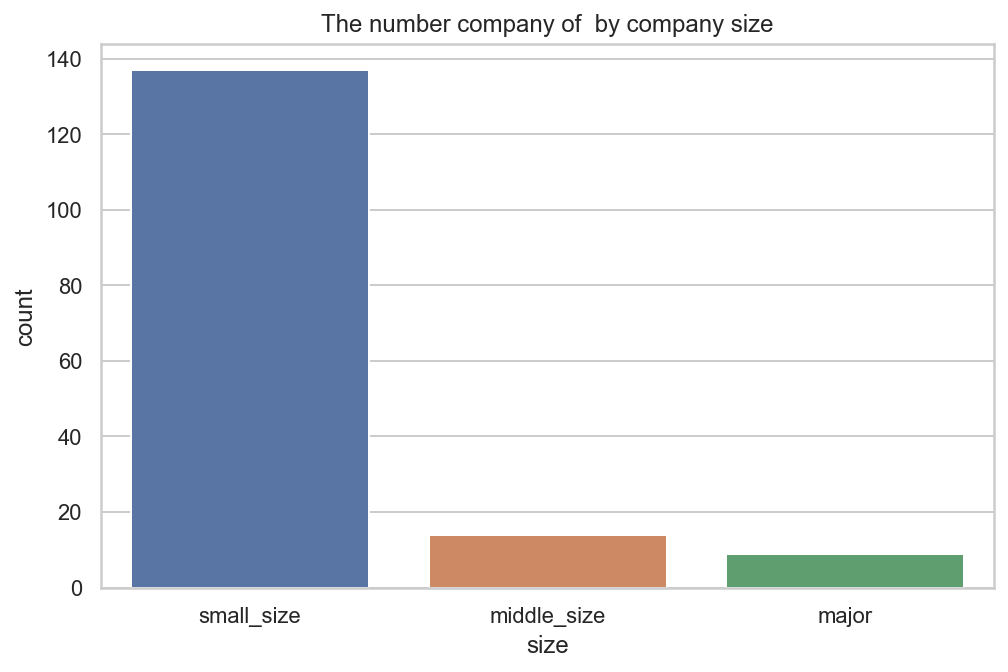

In [147]:
plt.figure(figsize=[8,5])
sns.set_theme(style="whitegrid")
p = sns.countplot(data=df, x='size')
p.set(title='The number company of  by company size')


# 기업규모별 평균 영업이익률

In [73]:
df2 = df
cond = df['규모'] == 'small_size'
small_revenue_rate = df2.loc[cond, '영업이익률'].mean()

In [74]:
cond = df2['규모'] == 'small_size'
df2.loc[cond, 'mean_profit_rate'] = small_revenue_rate

In [75]:
cond = df['규모'] == 'middle_size'
middle_revenue_rate = df2.loc[cond, '영업이익률'].mean()

In [76]:
cond = df2['규모'] == 'middle_size'
df2.loc[cond, 'mean_profit_rate'] = middle_revenue_rate

In [77]:
cond = df['규모'] == 'major'
major_revenue_rate = df2.loc[cond, '영업이익률'].mean()

In [78]:
cond = df2['규모'] == 'major'
df2.loc[cond, 'mean_profit_rate'] = major_revenue_rate

In [79]:
df2['size'] = df2['규모']

[Text(0.5, 1.0, 'Mean profit by company size')]

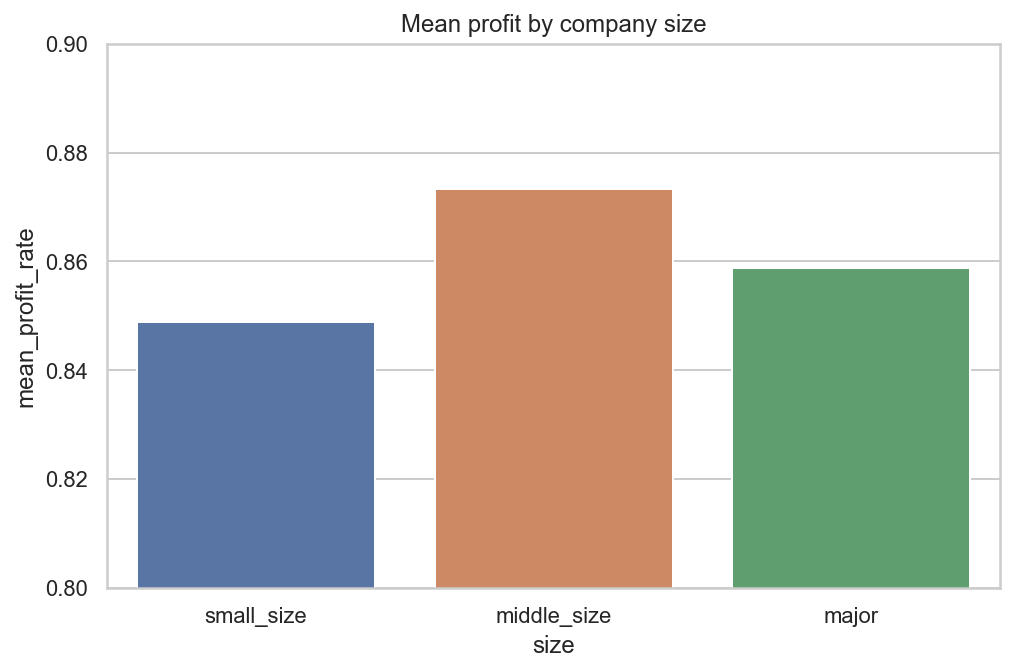

In [148]:
plt.figure(figsize=[8,5])
p = sns.barplot(data=df2, x='size', y='mean_profit_rate')
plt.ylim(0.8, 0.9)
p.set(title='Mean profit by company size')

# 통계적 검정

## shapiro 정규성 검정

- 귀무가설 영업이익률은 정규분포를 따른다.
- 대립가설 영업이익률은 정규분포를 따르지 않는다.

In [123]:
df['profit_rate'] = df['영업이익률']

(0.7, 1.0)

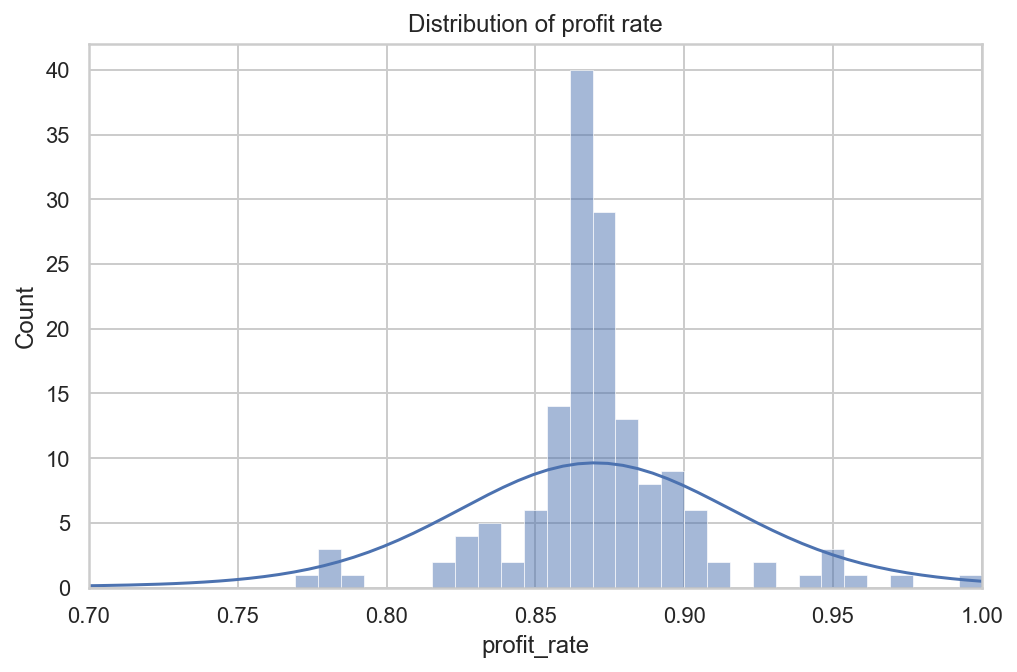

In [149]:
# 영업이익률 분포 확인
plt.figure(figsize=[8,5])
sns.set_theme(style="whitegrid")
p = sns.histplot(df['profit_rate'],  kde=True)
p.set(title='Distribution of profit rate')
plt.xlim(0.7, 1.0)

In [85]:
# 표본 수가 2000개 이상 Kolmogorov-Smirnov test
# 표본 수가 2000개 미만 Shapiro-Wilk test
from scipy.stats import shapiro

In [86]:
shapiro(df['영업이익률'])

ShapiroResult(statistic=0.389955997467041, pvalue=4.5373370224921964e-23)

- p-value < 0.05
- 귀무가설 기각
- 영업이익률은 정규분포를 따르지 않는다.

## kruskal-wallis 검정

- 귀무가설 : 그룹들의 모집단 중위수가 모두 같음
- 대립가설 : 그룹들의 모집단 중위수가 모두 같지 않음

In [116]:
df2['profit_rate'] = df2['영업이익률']

In [117]:
cond = df['규모'] == 'small_size'
df_small= df2.loc[cond, 'profit_rate']

In [118]:
cond = df['규모'] == 'middle_size'
df_middle= df2.loc[cond, 'profit_rate']

In [119]:
cond = df['규모'] == 'major'
df_major= df2.loc[cond, 'profit_rate']

In [121]:
stats.kruskal(df_small, df_middle, df_major)

KruskalResult(statistic=2.364551044156144, pvalue=0.30658031398900487)

- p-value > 0.05
- 대립가설 기각
- 그룹들의 모집단 중위수가 모두 같음

C:\Users\JuNoe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\JuNoe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\JuNoe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

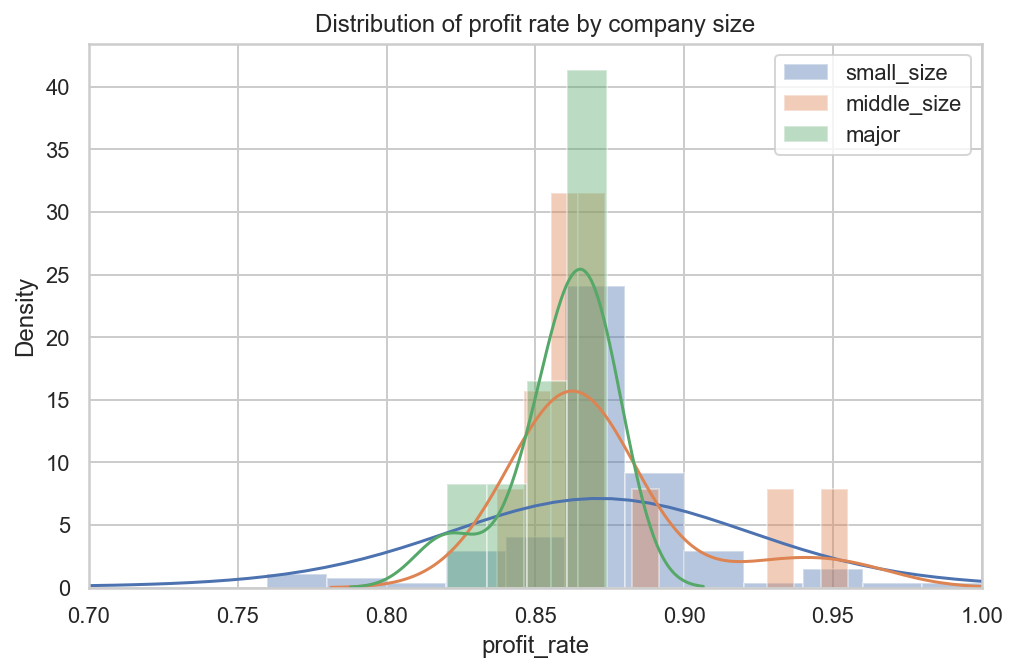

In [150]:
plt.figure(figsize=[8,5])
sns.set_theme(style="whitegrid")
ax = sns.distplot(df_small, kde=True,  label="small_size")
ax = sns.distplot(df_middle, kde=True,  label="middle_size")
ax = sns.distplot(df_major, kde=True,  label="major")
ax.set(title='Distribution of profit rate by company size')
plt.xlim(0.7, 1.0)
# ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()